
# Loading the Data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("mcdonalds.csv")

# Display the first few rows to understand the structure
print(df.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


# Data Cleaning

In [2]:
# Convert categorical 'Yes'/'No' to binary 1/0 for easier analysis
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Handle any special cases in the 'Like' column
df['Like'] = df['Like'].str.extract(r'([-+]?\d+)').astype(int)

# Convert 'Age' to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert 'VisitFrequency' to a categorical or ordinal variable
visit_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 2,
    'Every three months': 3,
    'Once a week': 4,
    'More than once a week': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_mapping)

# Check for and handle any missing values
df = df.dropna()  # or use df.fillna() for a more nuanced approach


# Exploratory Data Analysis (EDA)

             yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0.399309   
min       0.000000     0.000000     0

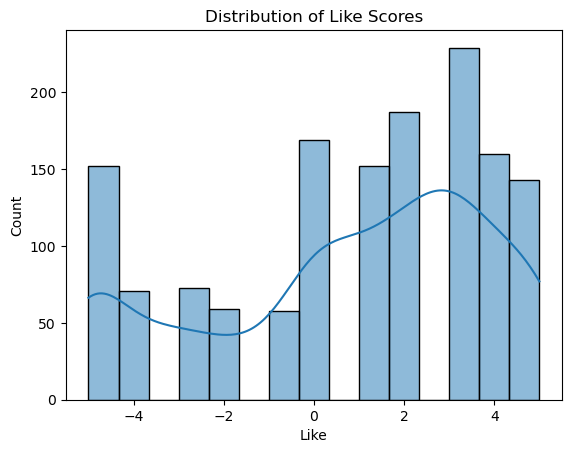

C:\Users\Dell\AppData\Local\Temp\ipykernel_5268\1879387667.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


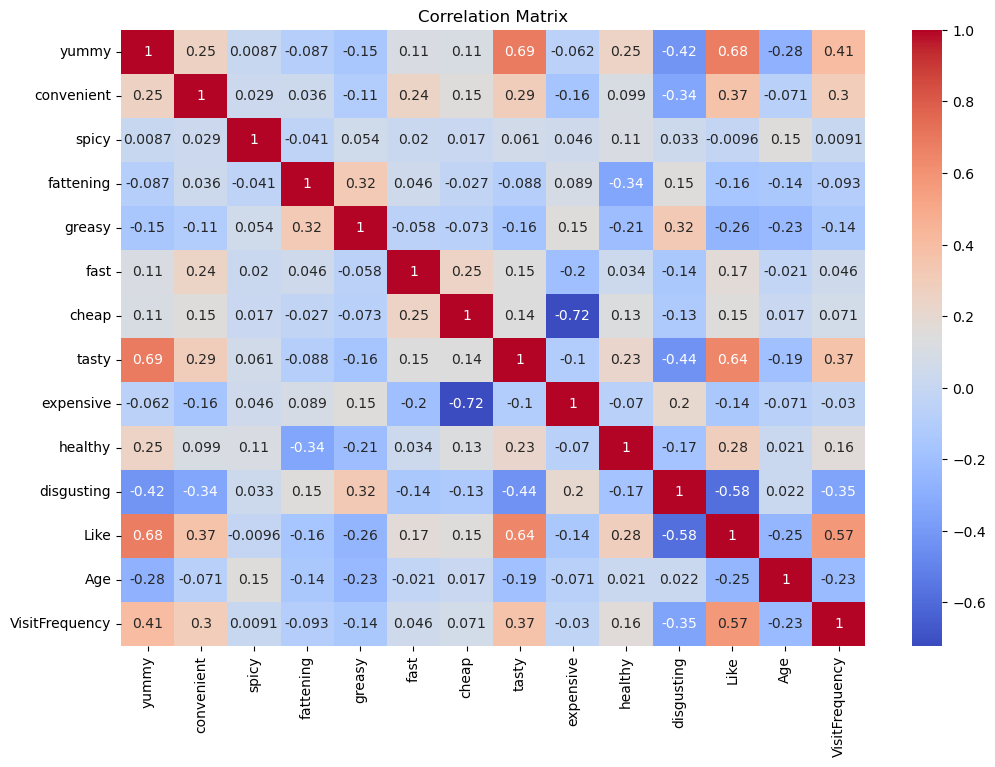

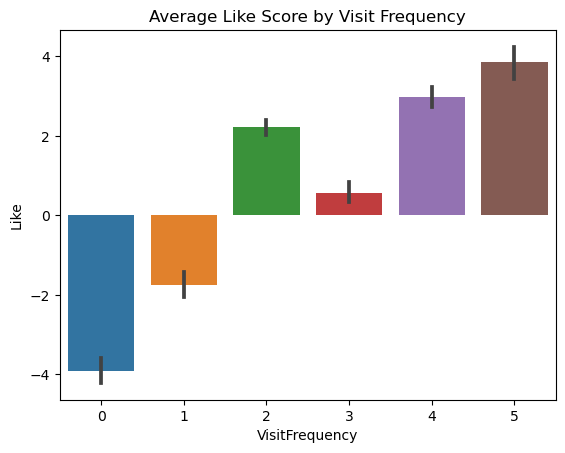

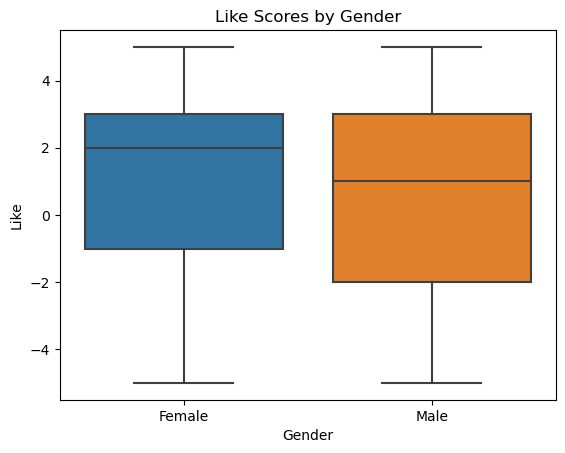

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic statistics
print(df.describe())

# Distribution of 'Like' scores
sns.histplot(df['Like'], kde=True)
plt.title('Distribution of Like Scores')
plt.show()

# Correlation matrix to understand relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Average 'Like' score based on 'VisitFrequency'
sns.barplot(x='VisitFrequency', y='Like', data=df)
plt.title('Average Like Score by Visit Frequency')
plt.show()

# Gender-based analysis
sns.boxplot(x='Gender', y='Like', data=df)
plt.title('Like Scores by Gender')
plt.show()


# Market Segmentation

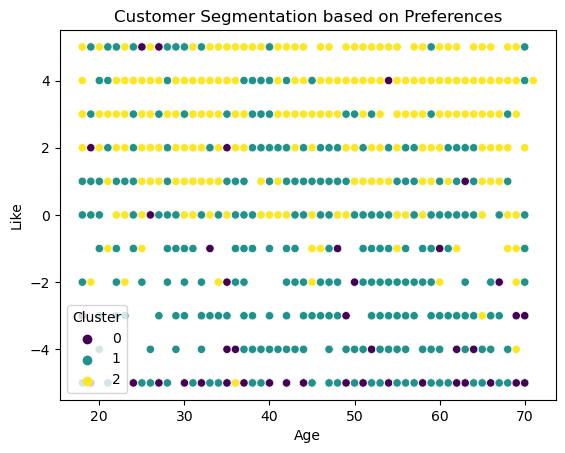

            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.110236    0.000000  0.062992   0.842520  0.732283  0.653543   
1        0.305471    1.000000  0.089666   0.957447  0.661094  0.889058   
2        0.880240    0.989521  0.103293   0.782934  0.354790  0.958084   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.338583  0.165354   0.637795  0.062992    0.740157 -3.086614   
1        0.389058  0.419453   0.547112  0.039514    0.343465 -0.369301   
2        0.854790  0.956587   0.118263  0.381737    0.049401  2.640719   

               Age  VisitFrequency  
Cluster                             
0        47.511811        1.078740  
1        45.513678        2.098784  
2        43.157186        2.766467  


C:\Users\Dell\AppData\Local\Temp\ipykernel_5268\1901549451.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = df[binary_columns]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
sns.scatterplot(x='Age', y='Like', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation based on Preferences')
plt.show()

# Display the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


# Decision Trees

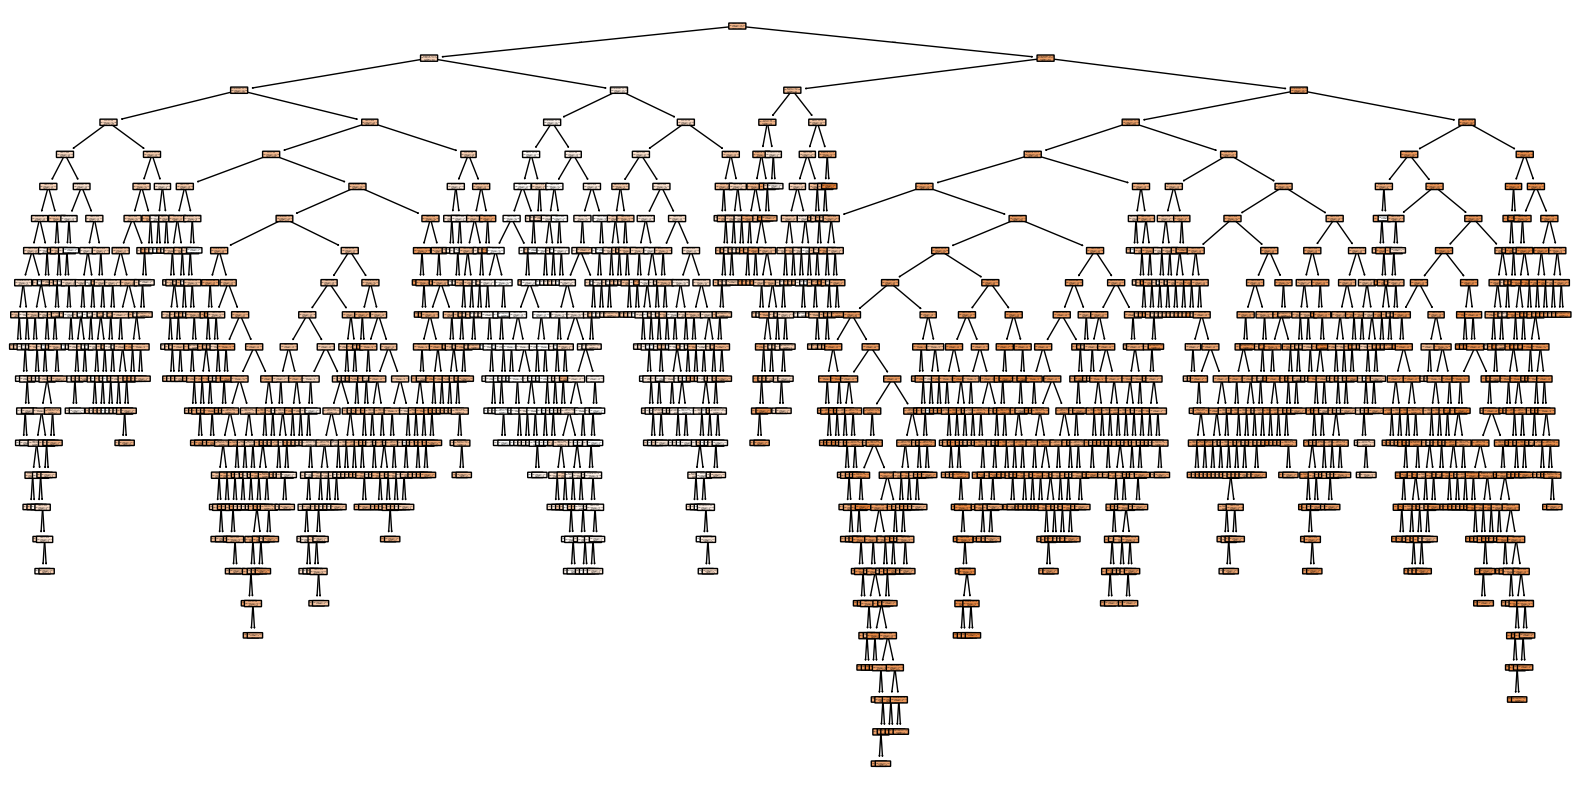

Training Score: 0.98
Testing Score: 0.46


In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree

# Select features and target variable
X = df[binary_columns + ['Age', 'VisitFrequency']]
y = df['Like']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")


# Logistic Regression

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[124  30]
 [ 13 124]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       154
           1       0.81      0.91      0.85       137

    accuracy                           0.85       291
   macro avg       0.86      0.86      0.85       291
weighted avg       0.86      0.85      0.85       291



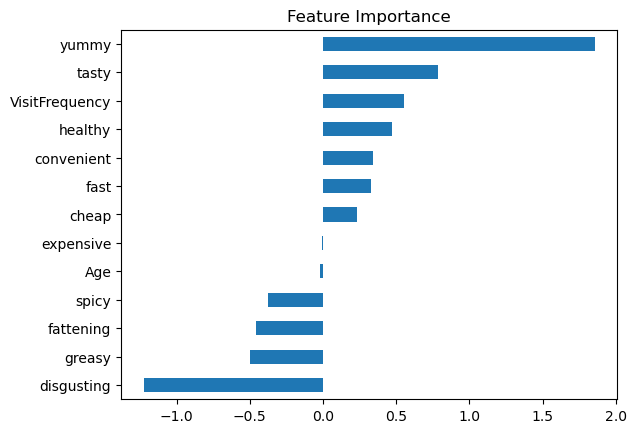

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Convert 'Like' to binary outcome
threshold = df['Like'].median()
df['LikeBinary'] = (df['Like'] > threshold).astype(int)

# Select features and target variable
X = df[binary_columns + ['Age', 'VisitFrequency']]
y = df['LikeBinary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()


# Segmentation with PCA

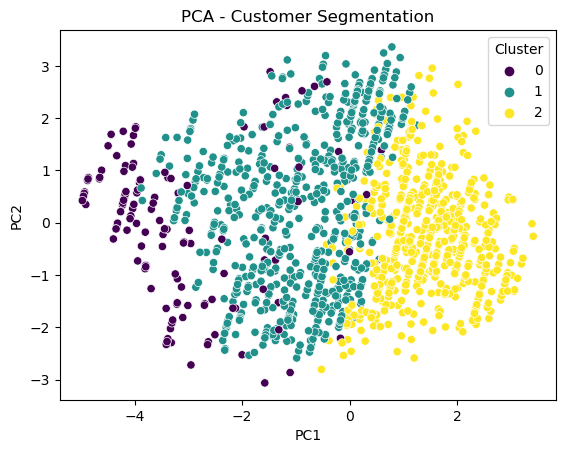

Explained variance by the first two principal components: 0.37


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[binary_columns + ['Age', 'VisitFrequency']])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot the PCA results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Customer Segmentation')
plt.show()

# Explained variance
print(f'Explained variance by the first two principal components: {pca.explained_variance_ratio_.sum():.2f}')
